# Final Project - Iris flower classification with Decision Trees 

The iris flower dataset is perhaps the most famous dataset for classification. It contains 3 types of flowers with 4 features (Sepal Length & Width, Petal Length & Width) https://archive.ics.uci.edu/ml/datasets/iris. 

### Perform the following operations:

1. Read the data into python using Pandas. Plot a scatter of Sepal length vs width for all the flowers. Similarly for Petal Length and width. 
2. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively.
3. Split your data into training and testing data set, it should be a 80:20 split with random state 9032. 
4. Obtain decision tree model for iris data set with **only petal length and width**. Depth should be 2. Show the decision tree. Obtain confusion matrix for the predictions.
5. Plot the decision tree boundaries of the **training dataset** using the mesh grid approach. The output may be one of the two figures given below. 
![Image](./data/DT_IRIS_1.png)
![Image](./data/DT_IRIS_2.png)

### Write down the observations when step numbers 4 & 5 are performed over a depth of tree 3 & 4. The comparison should be wrt entropy, confusion matrix and decision tree plot. Also plot the decision tree boundaries with the mesh grid.

In [1]:
import pandas as pd

In [2]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
df = pd.read_csv('./data/iris.data.txt', header=None, names=cols)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Read the data into python using Pandas. Plot a scatter of Sepal length vs width for all the flowers. Similarly for Petal Length and width. 

In [3]:
import matplotlib.pyplot as plt

Text(0,0.5,'Sepal Width')

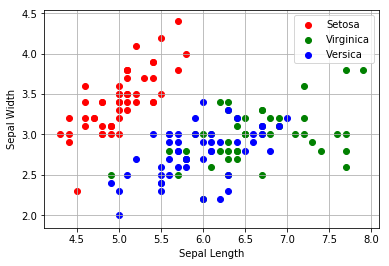

In [4]:
iris_set=df[df['flower']=='Iris-setosa']
iris_vir=df[df['flower']=='Iris-virginica']
iris_ver=df[df['flower']=='Iris-versicolor']

plt.scatter(iris_set['sepal_length'],iris_set['sepal_width'],c='r')
plt.scatter(iris_vir['sepal_length'],iris_vir['sepal_width'],c='g')
plt.scatter(iris_ver['sepal_length'],iris_ver['sepal_width'],c='b')

plt.legend(('Setosa','Virginica','Versica'))
plt.grid()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0,0.5,'Petal Width')

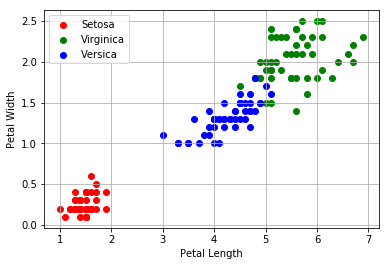

In [5]:
plt.scatter(iris_set['petal_length'],iris_set['petal_width'],c='r')
plt.scatter(iris_vir['petal_length'],iris_vir['petal_width'],c='g')
plt.scatter(iris_ver['petal_length'],iris_ver['petal_width'],c='b')
plt.legend(('Setosa','Virginica','Versica'))
plt.grid()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

## The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively.

In [6]:
flower_map={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['flower']=df['flower'].apply(lambda x: flower_map[x])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Split your data into training and testing data set, it should be a 80:20 split with random state 9032. 

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['petal_length','petal_width']],df['flower'],test_size=0.2,random_state=9032)

## Obtain decision tree model for iris data set with only petal length and width. Depth should be 2. Show the decision tree. Obtain confusion matrix for the predictions.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [9]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=2)
obtained_tree=decisiontree.fit(x_train,y_train)

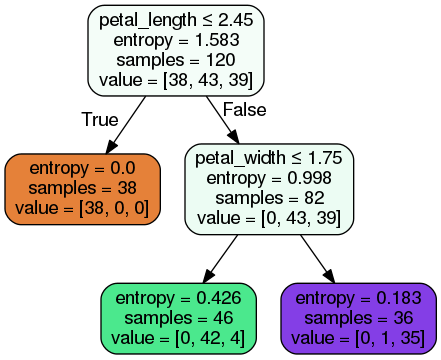

In [10]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

DecisionTreeImg=StringIO()

export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=
                ['petal_length','petal_width'],special_characters=True)

graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

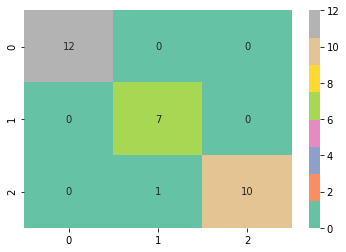

In [11]:
import seaborn as sb
Petal=obtained_tree.predict(x_test)
sb.heatmap(confusion_matrix(y_test,Petal),annot=True,cmap='Set2')

## Plot the decision tree boundaries of the training dataset using the mesh grid approach. The output may be one of the two figures given below.

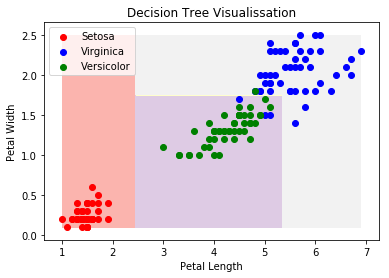

In [31]:
import numpy as np
x_min,x_max=df['petal_length'].min(),df['petal_length'].max()
y_min,y_max=df['petal_width'].min(),df['petal_width'].max()

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))

xx_lin=xx.ravel()
yy_lin=yy.ravel()

pred_inpt=np.c_[xx_lin,yy_lin]
DT=decisiontree.predict(pred_inpt)
DT=DT.reshape(xx.shape)
decisiontree.predict([[0,0],[1,1]])
plt.contourf(xx,yy,DT,cmap=plt.cm.Pastel1)
plt.scatter(iris_set.petal_length,iris_set.petal_width,label='Setosa',c='r')
plt.scatter(iris_vir.petal_length,iris_vir.petal_width,label='Virginica',c='b')
plt.scatter(iris_ver.petal_length,iris_ver.petal_width,label='Versicolor',c='g')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Tree Visualissation')
plt.legend()

## Write down the observations when step numbers 4 & 5 are performed over a depth of tree 3 & 4. The comparison should be wrt entropy, confusion matrix and decision tree plot. Also plot the decision tree boundaries with the mesh grid.

## Max_Depth: 3

In [32]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=3)
obtained_tree=decisiontree.fit(x_train,y_train)

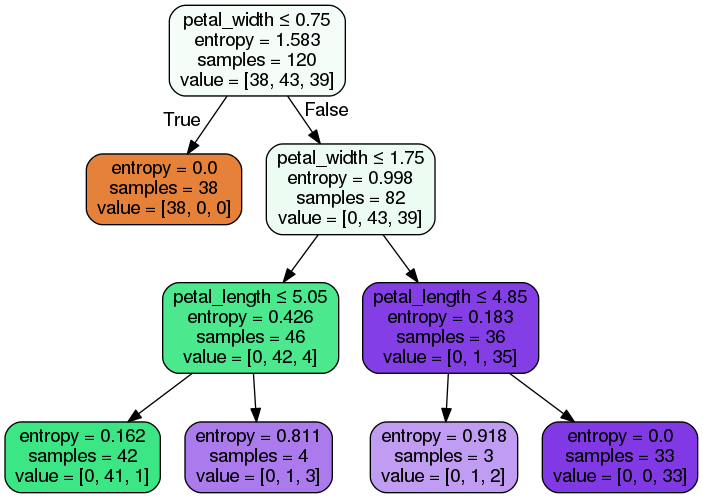

In [33]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

DecisionTreeImg=StringIO()

export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=
                ['petal_length','petal_width'],special_characters=True)

graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

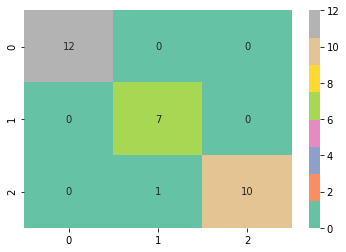

In [34]:
import seaborn as sb
Petal=obtained_tree.predict(x_test)
sb.heatmap(confusion_matrix(y_test,Petal),annot=True,cmap='Set2')

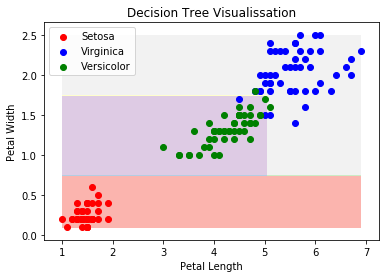

In [35]:
import numpy as np
x_min,x_max=df['petal_length'].min(),df['petal_length'].max()
y_min,y_max=df['petal_width'].min(),df['petal_width'].max()

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))

xx_lin=xx.ravel()
yy_lin=yy.ravel()

pred_inpt=np.c_[xx_lin,yy_lin]
DT=decisiontree.predict(pred_inpt)
DT=DT.reshape(xx.shape)
decisiontree.predict([[0,0],[1,1]])
plt.contourf(xx,yy,DT,cmap=plt.cm.Pastel1)
plt.scatter(iris_set.petal_length,iris_set.petal_width,label='Setosa',c='r')
plt.scatter(iris_vir.petal_length,iris_vir.petal_width,label='Virginica',c='b')
plt.scatter(iris_ver.petal_length,iris_ver.petal_width,label='Versicolor',c='g')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Tree Visualissation')
plt.legend()

## Max_Depth: 4

In [36]:
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
obtained_tree=decisiontree.fit(x_train,y_train)

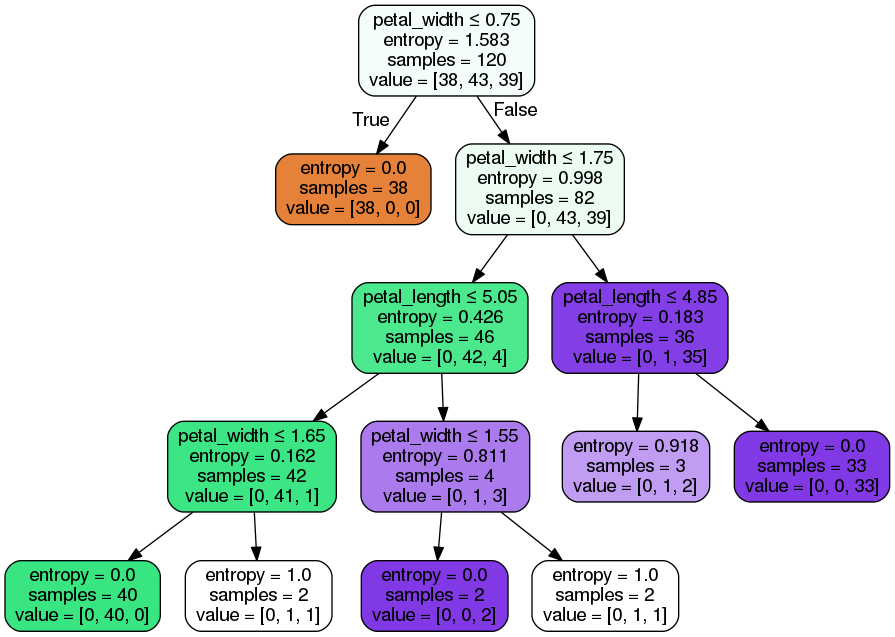

In [37]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

DecisionTreeImg=StringIO()

export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=
                ['petal_length','petal_width'],special_characters=True)

graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

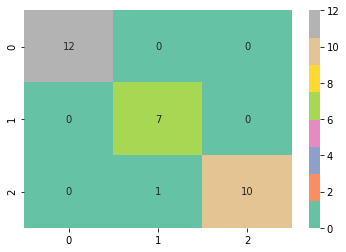

In [38]:
import seaborn as sb
Petal=obtained_tree.predict(x_test)
sb.heatmap(confusion_matrix(y_test,Petal),annot=True,cmap='Set2')

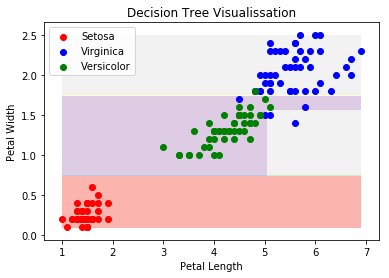

In [39]:
import numpy as np
x_min,x_max=df['petal_length'].min(),df['petal_length'].max()
y_min,y_max=df['petal_width'].min(),df['petal_width'].max()

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))

xx_lin=xx.ravel()
yy_lin=yy.ravel()

pred_inpt=np.c_[xx_lin,yy_lin]
DT=decisiontree.predict(pred_inpt)
DT=DT.reshape(xx.shape)
decisiontree.predict([[0,0],[1,1]])
plt.contourf(xx,yy,DT,cmap=plt.cm.Pastel1)
plt.scatter(iris_set.petal_length,iris_set.petal_width,label='Setosa',c='r')
plt.scatter(iris_vir.petal_length,iris_vir.petal_width,label='Virginica',c='b')
plt.scatter(iris_ver.petal_length,iris_ver.petal_width,label='Versicolor',c='g')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Tree Visualissation')
plt.legend()

### The tider the data i.e. the more classified the data is entropy will be lesser.
### Max Depth in Decision Tree is the number of sub-trees i.e. the more the max depth the more questions asked and the decision tree is more classified.